In [1]:
import pandas as pd
import numpy as np
import nltk
import datetime
import datetime

df_review = pd.read_csv('/Users/jiahehou/Downloads/detail_review.csv', encoding = "ISO-8859-1")
df_review['date'] = df_review['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))
df_review['pickup_year'] = df_review['date'].apply(lambda x:int(datetime.datetime.strftime(x,'%Y')))
df_review[df_review['pickup_year'] == 2018].reset_index().sample(10000)

,index,listing_id,id,date,reviewer_id,reviewer_name,comments,pickup_year
205943,829530,17285548,337499114,2018-10-16,20500016,Liesbet,The location is just absolutely perfect!\nIt i...,2018
154710,700361,13971185,307071074,2018-08-13,198048319,Michaela,Claudia and her whole family was more than per...,2018
261204,932493,20409141,262629798,2018-05-09,99409672,Erin,Ashleyâs apartment was just lovely! It was a...,2018
300156,984302,21813007,282538792,2018-06-27,196495427,Mark,We absolutely loved our stay in this artistica...,2018
361888,1047792,24543645,331403726,2018-10-02,8042268,David,I would recommend this place and definitely vi...,2018
102722,525963,8883269,275709431,2018-06-11,106317806,Jaime,Great value. Cozy but spacious enough (3 peopl...,2018
125590,607922,11421994,297276464,2018-07-27,23827564,Sanetsugu,"Little bit far from Brooklyn popular area,but ...",2018
19609,136628,818325,299715086,2018-07-31,180346052,Penelope,You wont be disappointed in the least! Shane i...,2018
57396,336934,4162292,321556377,2018-09-10,6504675,Leslie,"Comfortable space, stayed with 3 people with n...",2018
113686,567296,9824042,239150276,2018-02-28,46227518,Juraj,Greg is a great host. Very responsive and help...,2018


In [2]:
df_listing = pd.read_csv('/Users/jiahehou/Downloads/listings.csv', encoding = "ISO-8859-1")
df_listing

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15509,https://www.airbnb.com/rooms/15509,20181103152857,2018-11-04,Sleep at the CozySuite Sanctuary,Self catering lodging / vacation rental --fu...,We welcome travelers to CozySuite to sleep by ...,Self catering lodging / vacation rental --fu...,none,NaN,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,7,0.13
1,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
2,2539,https://www.airbnb.com/rooms/2539,20181103152857,2018-11-04,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181103152857,2018-11-04,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.35
4,15729,https://www.airbnb.com/rooms/15729,20181103152857,2018-11-04,Village Green,NaN,Beautiful bedroom in a duplex house with large...,Beautiful bedroom in a duplex house with large...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.21
5,3330,https://www.airbnb.com/rooms/3330,20181103152857,2018-11-04,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.33
6,16326,https://www.airbnb.com/rooms/16326,20181103152857,2018-11-04,Comfortable 4-bedroom apt in family house.,"Spacious and clean four bedroom, two bathroom ...",Brooklyn Vacation Rental for up to 8 people Va...,"Spacious and clean four bedroom, two bathroom ...",none,Great restaurants and bars cool shops (for exa...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,1.41
7,3647,https://www.airbnb.com/rooms/3647,20181103152857,2018-11-04,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN
8,3831,https://www.airbnb.com/rooms/3831,20181103152857,2018-11-04,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,NaN,NaN,f,f,moderate,f,f,1,4.35
9,16338,https://www.airbnb.com/rooms/16338,20181103152857,2018-11-04,Double Room w Private Deck Clinton Hill Best Area,Lovely and quiet double room at the back of th...,If you ask around anyone will tell you that th...,Lovely and quiet double room at the back of th...,none,Location Location! All the bars and restaurant...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,0.25


In [3]:
# narrowing location
df_listing = df_listing[df_listing['neighbourhood_group_cleansed']=='Manhattan']
df_listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
3,2595,https://www.airbnb.com/rooms/2595,20181103152857,2018-11-04,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.35
7,3647,https://www.airbnb.com/rooms/3647,20181103152857,2018-11-04,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN
10,5022,https://www.airbnb.com/rooms/5022,20181103152857,2018-11-03,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.10
11,16421,https://www.airbnb.com/rooms/16421,20181103152857,2018-11-04,Your Heaven in Hells Kitchen,We are offering longer term stays for an indiv...,"Charming, asian inspired two bedroom in the he...",We are offering longer term stays for an indiv...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1.75
13,16580,https://www.airbnb.com/rooms/16580,20181103152857,2018-11-04,"Sunny, Modern room in East Village!",This clean and very comfortable room in the Ea...,This listing is for 1 private room w/ a large ...,This clean and very comfortable room in the Ea...,none,East Village/ Alphabet City has tons of cafes ...,...,f,NaN,NaN,t,f,strict_14_with_grace_period,t,t,2,4.40
15,16821,https://www.airbnb.com/rooms/16821,20181103152857,2018-11-04,Large Room in Amazing East Village Apt,The apartment is among the best available in t...,The apartment is among the best available in t...,The apartment is among the best available in t...,none,The East Village is perhaps the neighborhood t...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,1.20
16,5099,https://www.airbnb.com/rooms/5099,20181103152857,2018-11-04,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.58
18,16885,https://www.airbnb.com/rooms/16885,20181103152857,2018-11-04,[1524-S] Lux Midtown East Studios - Walk to UN,The Beekman Tower is an Art Deco skyscraper si...,"Fully-furnished, Newly Renovated studios apart...",The Beekman Tower is an Art Deco skyscraper si...,none,NaN,...,f,NaN,NaN,f,f,super_strict_30,f,t,29,0.09
19,16974,https://www.airbnb.com/rooms/16974,20181103152857,2018-11-04,SpaHa Loft: Enormous and Bright,Our luxury loft occupies the entire second flo...,ABSOLUTELY NO SMOKING! PLEASE NOTE RATE VARIES...,Our luxury loft occupies the entire second flo...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,t,1,1.51


In [4]:
# define district
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

In [5]:
df_listing['district'] = df_listing['neighbourhood_cleansed'].map(lambda x:district(x))
df_listing

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district
1,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42,Upper Manhattan
3,2595,https://www.airbnb.com/rooms/2595,20181103152857,2018-11-04,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.35,Mid Manhattan
7,3647,https://www.airbnb.com/rooms/3647,20181103152857,2018-11-04,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN,Upper Manhattan
10,5022,https://www.airbnb.com/rooms/5022,20181103152857,2018-11-03,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.10,Upper Manhattan
11,16421,https://www.airbnb.com/rooms/16421,20181103152857,2018-11-04,Your Heaven in Hells Kitchen,We are offering longer term stays for an indiv...,"Charming, asian inspired two bedroom in the he...",We are offering longer term stays for an indiv...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1.75,Mid West Manhattan
13,16580,https://www.airbnb.com/rooms/16580,20181103152857,2018-11-04,"Sunny, Modern room in East Village!",This clean and very comfortable room in the Ea...,This listing is for 1 private room w/ a large ...,This clean and very comfortable room in the Ea...,none,East Village/ Alphabet City has tons of cafes ...,...,NaN,NaN,t,f,strict_14_with_grace_period,t,t,2,4.40,Lower Manhattan
15,16821,https://www.airbnb.com/rooms/16821,20181103152857,2018-11-04,Large Room in Amazing East Village Apt,The apartment is among the best available in t...,The apartment is among the best available in t...,The apartment is among the best available in t...,none,The East Village is perhaps the neighborhood t...,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,1.20,Lower Manhattan
16,5099,https://www.airbnb.com/rooms/5099,20181103152857,2018-11-04,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.58,Mid East Manhattan
18,16885,https://www.airbnb.com/rooms/16885,20181103152857,2018-11-04,[1524-S] Lux Midtown East Studios - Walk to UN,The Beekman Tower is an Art Deco skyscraper si...,"Fully-furnished, Newly Renovated studios apart...",The Beekman Tower is an Art Deco skyscraper si...,none,NaN,...,NaN,NaN,f,f,super_strict_30,f,t,29,0.09,Mid East Manhattan
19,16974,https://www.airbnb.com/rooms/16974,20181103152857,2018-11-04,SpaHa Loft: Enormous and Bright,Our luxury loft occupies the entire second flo...,ABSOLUTELY NO SMOKING! PLEASE NOTE RATE VARIES...,Our luxury loft occupies the entire second flo...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,t,1,1.51,Upper Manhattan


In [6]:
df_listing.rename(columns={'id':'listing_id'}, inplace=True)
df_listing

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district
1,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42,Upper Manhattan
3,2595,https://www.airbnb.com/rooms/2595,20181103152857,2018-11-04,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.35,Mid Manhattan
7,3647,https://www.airbnb.com/rooms/3647,20181103152857,2018-11-04,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN,Upper Manhattan
10,5022,https://www.airbnb.com/rooms/5022,20181103152857,2018-11-03,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.10,Upper Manhattan
11,16421,https://www.airbnb.com/rooms/16421,20181103152857,2018-11-04,Your Heaven in Hells Kitchen,We are offering longer term stays for an indiv...,"Charming, asian inspired two bedroom in the he...",We are offering longer term stays for an indiv...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1.75,Mid West Manhattan
13,16580,https://www.airbnb.com/rooms/16580,20181103152857,2018-11-04,"Sunny, Modern room in East Village!",This clean and very comfortable room in the Ea...,This listing is for 1 private room w/ a large ...,This clean and very comfortable room in the Ea...,none,East Village/ Alphabet City has tons of cafes ...,...,NaN,NaN,t,f,strict_14_with_grace_period,t,t,2,4.40,Lower Manhattan
15,16821,https://www.airbnb.com/rooms/16821,20181103152857,2018-11-04,Large Room in Amazing East Village Apt,The apartment is among the best available in t...,The apartment is among the best available in t...,The apartment is among the best available in t...,none,The East Village is perhaps the neighborhood t...,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,1.20,Lower Manhattan
16,5099,https://www.airbnb.com/rooms/5099,20181103152857,2018-11-04,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.58,Mid East Manhattan
18,16885,https://www.airbnb.com/rooms/16885,20181103152857,2018-11-04,[1524-S] Lux Midtown East Studios - Walk to UN,The Beekman Tower is an Art Deco skyscraper si...,"Fully-furnished, Newly Renovated studios apart...",The Beekman Tower is an Art Deco skyscraper si...,none,NaN,...,NaN,NaN,f,f,super_strict_30,f,t,29,0.09,Mid East Manhattan
19,16974,https://www.airbnb.com/rooms/16974,20181103152857,2018-11-04,SpaHa Loft: Enormous and Bright,Our luxury loft occupies the entire second flo...,ABSOLUTELY NO SMOKING! PLEASE NOTE RATE VARIES...,Our luxury loft occupies the entire second flo...,none,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,t,1,1.51,Upper Manhattan


In [7]:
# merge two dataframe along listing_id
result = pd.merge(df_listing, df_review, on = 'listing_id')
result = result.dropna(subset=['comments'])
result

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district,id,date,reviewer_id,reviewer_name,comments,pickup_year
0,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...,2008
1,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,859,2009-03-08,8455,Roland,Such a wonderful place and very close to the m...,2009
2,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,1083,2009-03-25,9759,Cem,I just got back from a trip to NYC during whic...,2009
3,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,1107,2009-03-27,9193,Holly,Stephanie's offered all the most important thi...,2009
4,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,2175,2009-05-09,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu...",2009
5,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,2889,2009-05-20,12521,Michael,I was pleasantly surprised with my whole stay ...,2009
6,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,3213,2009-05-27,5889,Becca,Stephanie's apt was great. Very convenient to ...,2009
7,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,3313,2009-05-30,15342,Sarah,my husband and i had such a great time staying...,2009
8,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,7144,2009-08-10,26899,Maria Luisa,"When I first arrived at Stephanie's, she was v...",2009
9,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,3,1.42,Upper Manhattan,7350,2009-08-13,26718,Greg,awesome couldn't have been better.,2009


In [8]:
nrc = "/Users/jiahehou/Downloads/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count = 0
emotion_dict = dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count += 1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]

In [9]:
def get_nrc_data():
    nrc = "/Users/jiahehou/Downloads/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count = 0
    emotion_dict =dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count += 1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [ ]:
result_list = []

In [31]:
# sentiment for upper Manhattan
upper_M = str()
for comment in result.loc[(result['district'] == 'Upper Manhattan'), 'comments'].iloc[:1000]:
    upper_M += str(comment)
def upper_m():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Upper Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(upper_M.split())
    return emotion_count
um = upper_m()
result_list.append(um)

In [32]:
# sentiment for Upper West Manhattan
upper_W = str()
for comment in result.loc[(result['district'] == 'Upper West Manhattan'), 'comments'].iloc[:1000]:
    upper_W += str(comment)
def upper_w():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Upper West Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(upper_W.split())
    return emotion_count
uw = upper_w()
result_list.append(uw)

In [33]:
# sentiment for Upper East Manhattan
upper_E = str()
for comment in result.loc[(result['district'] == 'Upper East Manhattan'), 'comments'].iloc[:1000]:
    upper_E += str(comment)
def upper_e():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Upper East Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(upper_E.split())
    return emotion_count
ue = upper_e()
result_list.append(ue)

In [35]:
# sentiment for Mid West Manhattan
mid_W = str()
for comment in result.loc[(result['district'] == 'Mid West Manhattan'), 'comments'].iloc[:1000]:
    mid_W += str(comment)
def mid_w():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Mid West Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(mid_W.split())
    return emotion_count
mw = mid_w()
result_list.append(mw)

In [36]:
# sentiment for Mid Manhattan
mid_M = str()
for comment in result.loc[(result['district'] == 'Mid Manhattan'), 'comments'].iloc[:1000]:
    mid_M += str(comment)
    
def mid_m():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Mid Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(mid_M.split())
    return emotion_count
mm = mid_m()
result_list.append(mm)

In [37]:
# sentiment for Mid East Manhattan
mid_E = str()
for comment in result.loc[(result['district'] == 'Mid East Manhattan'), 'comments'].iloc[:1000]:
    mid_E += str(comment)
    
def mid_e():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Mid East Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(mid_E.split())
    return emotion_count
me = mid_e()
result_list.append(me)

In [38]:
# sentiment for Lower Manhattan
lower_M = str()
for comment in result.loc[(result['district'] == 'Lower Manhattan'), 'comments'].iloc[:1000]:
    lower_M += str(comment)
    
def lower_m():
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    for review in result.loc[(result['district'] == 'Lower Manhattan'), 'comments'].iloc[:1000]:
        for word in str(review).split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(lower_M.split())
    return emotion_count
lm = lower_m()
result_list.append(lm)

In [49]:
result_list = result_list[1:]

In [90]:
# construct dataframe for sentiment analysis above
combined_dict = {}
for key in result_list[0].keys():
    combined_dict[key] = list(item[key] for item in result_list)
df_sentiment = pd.DataFrame(combined_dict, columns = ['trust', 'sadness', 'fear', 'positive', 'negative',
                                                  'surprise', 'anger', 'joy', 'disgust', 'anticipation'])
df_sentiment['district'] = ['Upper West Manhattan', 'Upper Manhattan', 'Upper East Manhattan',
                         'Mid West Manhattan', 'Mid Manhattan', 'Mid East Manhattan', 'Lower Manhattan']
df_sentiment.set_index('district', inplace = True)
df_sentiment


,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation
district,,,,,,,,,,
Upper West Manhattan,0.023736,0.005758,0.003083,0.039378,0.006983,0.009053,0.001478,0.021413,0.001225,0.017232
Upper Manhattan,0.028573,0.005711,0.002723,0.044479,0.006624,0.010177,0.002026,0.024655,0.001361,0.020305
Upper East Manhattan,0.026826,0.007028,0.003297,0.042516,0.008518,0.009255,0.001996,0.021923,0.001909,0.017599
Mid West Manhattan,0.023487,0.005274,0.002886,0.040075,0.008187,0.008160,0.002067,0.020695,0.001866,0.017743
Mid Manhattan,0.025847,0.005390,0.003245,0.040014,0.008091,0.007720,0.002359,0.020701,0.001716,0.017298
Mid East Manhattan,0.024716,0.005769,0.002618,0.040040,0.008224,0.007943,0.002189,0.019569,0.001553,0.016965
Lower Manhattan,0.028342,0.005493,0.002427,0.042537,0.007153,0.008990,0.001772,0.022721,0.000926,0.019145


In [88]:
df_sentiment['highest_sentiment'] = df_sentiment.idxmax(axis=1)

In [91]:
df_sentiment['lowest_sentiment'] = df_sentiment.idxmin(axis=1)

In [92]:
df_sentiment

,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation,lowest_sentiment
district,,,,,,,,,,,
Upper West Manhattan,0.023736,0.005758,0.003083,0.039378,0.006983,0.009053,0.001478,0.021413,0.001225,0.017232,disgust
Upper Manhattan,0.028573,0.005711,0.002723,0.044479,0.006624,0.010177,0.002026,0.024655,0.001361,0.020305,disgust
Upper East Manhattan,0.026826,0.007028,0.003297,0.042516,0.008518,0.009255,0.001996,0.021923,0.001909,0.017599,disgust
Mid West Manhattan,0.023487,0.005274,0.002886,0.040075,0.008187,0.008160,0.002067,0.020695,0.001866,0.017743,disgust
Mid Manhattan,0.025847,0.005390,0.003245,0.040014,0.008091,0.007720,0.002359,0.020701,0.001716,0.017298,disgust
Mid East Manhattan,0.024716,0.005769,0.002618,0.040040,0.008224,0.007943,0.002189,0.019569,0.001553,0.016965,disgust
Lower Manhattan,0.028342,0.005493,0.002427,0.042537,0.007153,0.008990,0.001772,0.022721,0.000926,0.019145,disgust


In [53]:
joy_first = df_sentiment.sort_values(['joy'], ascending=False)
joy_first

,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation
district,,,,,,,,,,
Upper Manhattan,0.028573,0.005711,0.002723,0.044479,0.006624,0.010177,0.002026,0.024655,0.001361,0.020305
Lower Manhattan,0.028342,0.005493,0.002427,0.042537,0.007153,0.008990,0.001772,0.022721,0.000926,0.019145
Upper East Manhattan,0.026826,0.007028,0.003297,0.042516,0.008518,0.009255,0.001996,0.021923,0.001909,0.017599
Upper West Manhattan,0.023736,0.005758,0.003083,0.039378,0.006983,0.009053,0.001478,0.021413,0.001225,0.017232
Mid Manhattan,0.025847,0.005390,0.003245,0.040014,0.008091,0.007720,0.002359,0.020701,0.001716,0.017298
Mid West Manhattan,0.023487,0.005274,0.002886,0.040075,0.008187,0.008160,0.002067,0.020695,0.001866,0.017743
Mid East Manhattan,0.024716,0.005769,0.002618,0.040040,0.008224,0.007943,0.002189,0.019569,0.001553,0.016965


In [66]:
name_list = []
for name in df_listing['host_name']:
    name_list.append(str(name))

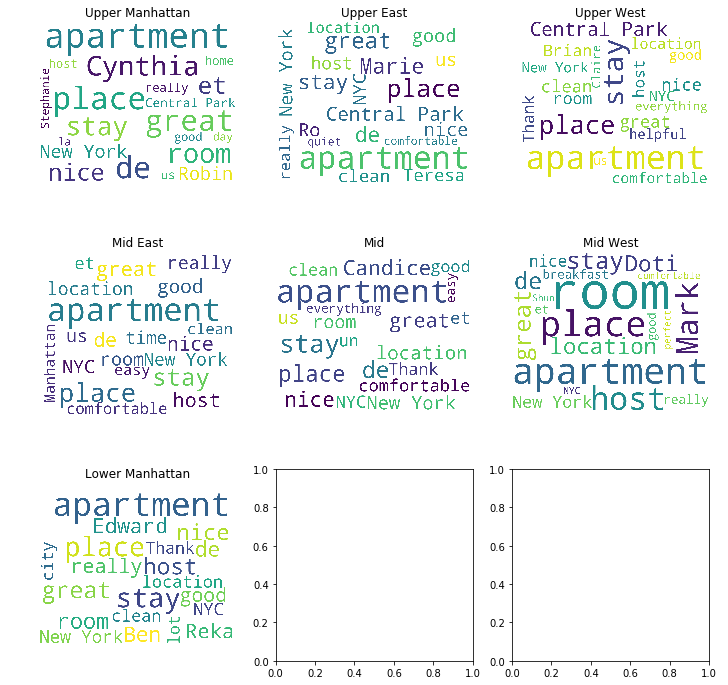

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string

def remove_names(text_string,name_list):
    for word in name_list:
        text_string = text_string.replace(word,' ')
    return text_string

# text_string = remove_names(upper_M)
# text_string = remove_words(upper_M)
# text_string = remove_short_words(upper_M)

# wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()


texts = []
texts.append(upper_M)
texts.append(upper_E)
texts.append(upper_W)
texts.append(mid_E)
texts.append(mid_M)
texts.append(mid_W)
texts.append(lower_M)

COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

title_list = ['Upper Manhattan', 'Upper East', 'Upper West', 'Mid East', 'Mid', 'Mid West', 'Lower Manhattan']
for i in range(0,len(texts)):
    text_string = remove_words(texts[i])
    text_string = remove_short_words(text_string)
    ax = axes[i//3, i%3] 
    ax.set_title(title_list[i])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()